Burger’s Equation

Burger’s equation in on spatial dimension looks like:

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = v \frac{\partial^2 u}{\partial x^2}$$

This is combination of linear convection and diffusion. Discretize using the methods we have seen.

$$\frac{u_i^{n+1} - u_i^n}{\Delta t} + u_i^n \frac{u_i^n - u_{i-1}^n}{\Delta x} = v \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\Delta x^2}$$

We will step in time as follows:

$$u_i^{n+1} = u_i^n - u_i^n\frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n) + v \frac{\Delta t}{\Delta x^2}(u_{i+1}^n - 2u_i^n + u_{i-1}^n)$$

Initial and  Boundary Conditions


$$u = -\frac{2v}{\phi} \frac{\partial \phi}{\partial x} + 4$$

$$\phi (t=0) = \phi_0 = exp \left( \frac{-x^2}{4v} \right) + exp \left(  \frac{-(x-2 \pi)^2}{4v} \right ) $$

This has analytical solution:

$$u = -\frac{2v}{\phi}\frac{\partial \phi}{\partial x} + 4$$
$$ \phi = exp \left ( \frac{-(x-4t)^2}{4v(t+1)} \right ) + exp \left ( \frac{-(x-4t-2 \pi)^2}{4v(t+1)} \right )$$

Boundary Condition: 
$$u(0) = u(2 \pi)$$

Saving Time with SymPy

SymPy is the symbolic math library for python. It has same symbolic functionality as mathematica

In [2]:
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

#tell sympy to render all output using LaTeX

from sympy import init_printing
init_printing()


In [4]:
x = sympy.symbols('x')

In [5]:
x

In [6]:
5*x

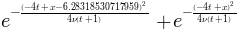

In [9]:
x, nu, t = sympy.symbols('x nu t')
phi = sympy.exp(-(x-4*t)**2/(4*nu*(t+1))) + \
sympy.exp(-(x-4*t-2*numpy.pi)**2/(4*nu*(t+1)))
phi

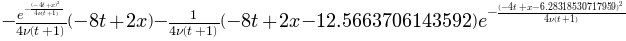

In [12]:
phiprime =phi.diff(x)
phiprime

In [13]:
print(phiprime)

-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 12.5663706143592)*exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1)))/(4*nu*(t + 1))


In [14]:
#Lambdify function takes a sympy symbolic equation and turns it into a callable function
from sympy.utilities.lambdify import lambdify

u = -2*nu*(phiprime/phi)+4
print(u)

-2*nu*(-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 12.5663706143592)*exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)))/(exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))) + 4


In [16]:
u_lamb = lambdify((t,x,nu), u)
print("The value of u at t=1, x=4, nu=3 is {}.".format(u_lamb(1,4,3)))

The value of u at t=1, x=4, nu=3 is 3.4917066420644494.


In [18]:
#Back to Burger's Equation
nx = 101
nt = 100
dx = 2*numpy.pi/(nx-1)
nu = .07
sigma =.1
dt = sigma*dx**2/nu

x = numpy.linspace(0,2*numpy.pi, nx)
un = numpy.empty(nx)
t = 0


In [19]:
u = numpy.asarray([u_lamb(t,x0,nu) for x0 in x])
u

array([ 4.        ,  4.06283185,  4.12566371,  4.18849556,  4.25132741,
        4.31415927,  4.37699112,  4.43982297,  4.50265482,  4.56548668,
        4.62831853,  4.69115038,  4.75398224,  4.81681409,  4.87964594,
        4.9424778 ,  5.00530965,  5.0681415 ,  5.13097336,  5.19380521,
        5.25663706,  5.31946891,  5.38230077,  5.44513262,  5.50796447,
        5.57079633,  5.63362818,  5.69646003,  5.75929189,  5.82212374,
        5.88495559,  5.94778745,  6.0106193 ,  6.07345115,  6.136283  ,
        6.19911486,  6.26194671,  6.32477856,  6.38761042,  6.45044227,
        6.51327412,  6.57610598,  6.63893783,  6.70176967,  6.76460125,
        6.82742866,  6.89018589,  6.95176632,  6.99367964,  6.72527549,
        4.        ,  1.27472451,  1.00632036,  1.04823368,  1.10981411,
        1.17257134,  1.23539875,  1.29823033,  1.36106217,  1.42389402,
        1.48672588,  1.54955773,  1.61238958,  1.67522144,  1.73805329,
        1.80088514,  1.863717  ,  1.92654885,  1.9893807 ,  2.05

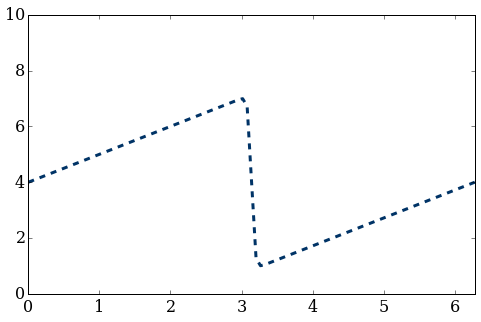

In [25]:
pyplot.figure(figsize=(8,5), dpi=100)
pyplot.plot(x,u, color='#003366', ls='--', lw=3)
pyplot.xlim([0,2*numpy.pi])
pyplot.ylim([0,10]);